In [25]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error,r2_score

In [6]:
df=pd.read_csv("IMDB-Movie-Data.csv",encoding='latin1')

In [7]:
df.head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [8]:
df.describe()


,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [ ]:
df.isnull().sum()


Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [14]:
df["Revenue (Millions)"]=df["Revenue (Millions)"].fillna(df["Revenue (Millions)"].median())
df["Metascore"]=df["Metascore"].fillna(df["Metascore"].median())
df.isnull().sum()


Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [ ]:
df["Genre"] = df["Genre"].astype(str)
df_genres = df["Genre"].str.get_dummies(sep=",")
df = pd.concat([df, df_genres], axis=1)



In [ ]:

le=LabelEncoder()
df["Director"]=le.fit_transform(df["Director"])


In [21]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,265,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,...,0,0,0,0,0,1,0,0,0,0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",518,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,...,0,0,0,1,0,1,0,0,0,0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,391,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,...,1,0,0,0,0,0,0,1,0,0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",105,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,...,0,0,0,0,0,0,0,0,0,0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,136,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,...,0,0,0,0,0,0,0,0,0,0


In [ ]:

df.head()
y=df["Rating"]
x=df.drop(columns=["Title","Genre","Description","Actors"])


In [24]:
X_train,x_test,Y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [53]:


model = RandomForestRegressor(random_state=42)
model.fit(X_train, Y_train)




RandomForestRegressor(random_state=42)

In [54]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(x_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))


RMSE: 0.07057905732817146
R²: 0.9945970956905117


In [55]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(model, x, y, cv=5, scoring="r2")
print("Cross-validation R²:", np.mean(scores))


Cross-validation R²: 0.9954149986414829


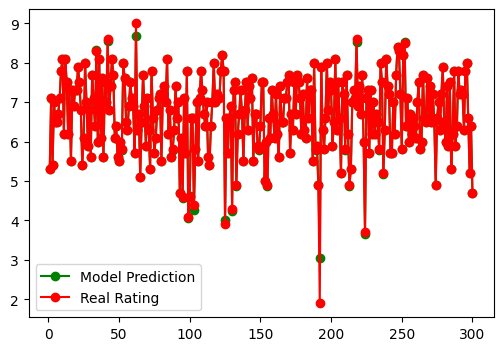

In [61]:
import matplotlib.pylab as plt
range1=range(1,len(y_pred)+1)
plt.figure(figsize=(6,4))
plt.plot(range1,y_pred,"o-",color="green",label="Model Prediction")
plt.plot(range1,y_test,"o-",color="red",label="Real Rating")
plt.legend()
plt.show()

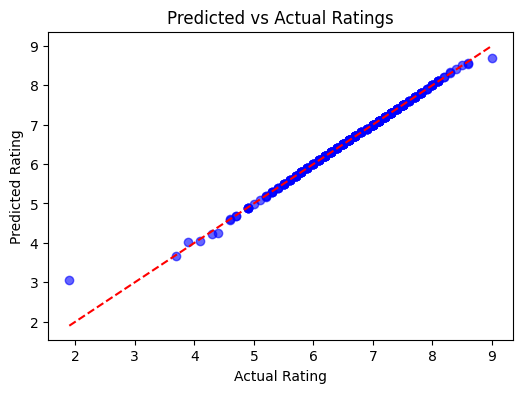

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(y_test,y_pred,color="blue",alpha=0.6)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],"r--")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Predicted vs Actual Ratings")
plt.show()

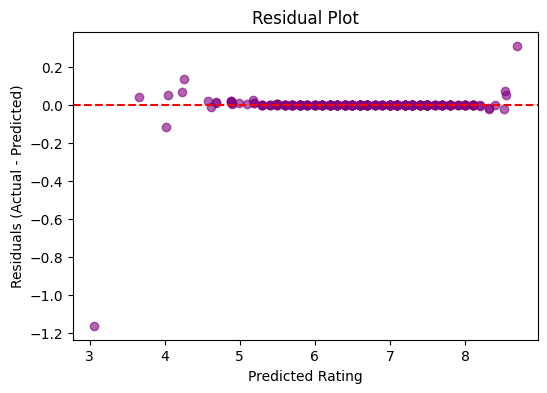

In [60]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Rating")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()
